# Lecture 25 EEP118

## Limited Dependent Variable

1. Logit Model Parameters/ Marginal Effects

    Parameters

    Marginal effects for continuous x

    Marginal effects for discrete x

2. Estimation Maximum Likelihood

3. Tests. Goodness of Fit. Likelihood Ratio Test

   The chi square distribution
   

Guest speaker: Law school


Study all of chapter 17.1


Posted all remaining DA and solutions, Practice final also





### Limited Depedent Variable Y

The basic context of this set of lectures is when Y is not continuous

Y=0 or 1, Y is binary. YES/NO

Use a Data set on Women labor force participation

Source:  MROZ.RAW in Wooldridge.  T.A. Mroz (1987), “The Sensitivity of an Empirical Model of Married Women’s Hours of Work to Economic and Statistical Assumptions,” Econometrica 55, 765-799.


Y= 1 or 0  column called inlf  (short for in labor force)

Obs:   N=753

inlf                byte   %9.0g                  inlf=1 if in labor force, 1975, inlf=0 otherwise

age                byte   %9.0g                  woman's age in years

educ               byte   %9.0g                  years of schooling

kidslt6           byte   %9.0g                  # kids < 6 years

kidsge6           byte   %9.0g                  # kids 6-18

nwifeinc         float  %9.0g                  (faminc - wage*hours)/1000

hushrs            int    %9.0g                   hours worked by husband, 1975

husage           byte   %9.0g                  husband's age

huseduc          byte   %9.0g                  husband's years of schooling

huswage         float  %9.0g                  husband's hourly wage, 1975

city                   byte   %9.0g                  =1 if live in SMSA


In [ ]:

# Load the 'pacman' package
library(pacman) 
#packages to use load them now using the pacman "manager"
p_load(dplyr, haven, readr) 
#Another great feature of p_load(): if you try to load a package that is not installed on your machine, p_load() install the package for you, rather than throwing an error. For instance, let’s install and load one final package named ggplot2. 
p_load(ggplot2)


pacman::p_load(lfe, lmtest, haven, sandwich, tidyverse)
# lfe for running fixed effects regression
# lmtest for displaying robust SE in output table
# haven for loading in dta files
# sandwich for producing robust Var-Cov matrix
# tidyverse for manipulating data and producing plots


#The big difference with Stata that appears here is lm() by default 
#doesn't compute robust SE - we have to use additional packages/functions 
#to compute it. felm does allow for multi-way clustering by default though 
#which is nice.

#I added an alternate version of the first plots to show that we can 
#change the color of the points according to whether the prediction 
#is in [0,1] or outside of it. You can also specify factor(inlf) for 
#the latter plots of actual vs. predicted to only have the values 0 or 1 on 
#the x-axis.


pacman::p_load(lfe, lmtest, margins, haven, sandwich, tidyverse)
# lfe for running fixed effects regression
# lmtest for displaying robust SE in output table
# haven for loading in dta files
# sandwich for producing robust Var-Cov matrix
# tidyverse for manipulating data and producing plots
install.packages(sandwich)
install.packages(lfe)
install.packages(lmtest)
install.packages(tidyverse)
library(sandwich)
library(lfe)
library(lmtest)
library(tidyverse)


# alternate plot theme for ggplot
theme_ed <- theme(
  legend.position = "bottom",
  panel.background = element_rect(fill = NA),
  # panel.border = element_rect(fill = NA, color = "grey75"),
  axis.ticks = element_line(color = "grey95", size = 0.3),
  panel.grid.major = element_line(color = "grey95", size = 0.3),
  panel.grid.minor = element_line(color = "grey95", size = 0.3),
  legend.key = element_blank())

In [ ]:
#load data
mydata<- read_dta("Lecture24MROZ.DTA") 
#Summary stats inlf age educ kidslt6 kidsge6 nwifeinc hushrs husage huseduc huswage unem city 
summary(mydata)

# Fixing Problem 2, make sure predictions are between 0 and 1

Solution Problem 1 – 

use a functional for for the probability as a function G( ) of the xs that stays between 0 and 1  

e.g., the Logit Model!


the ratio of exponents in the logit below is always between 0 and 1


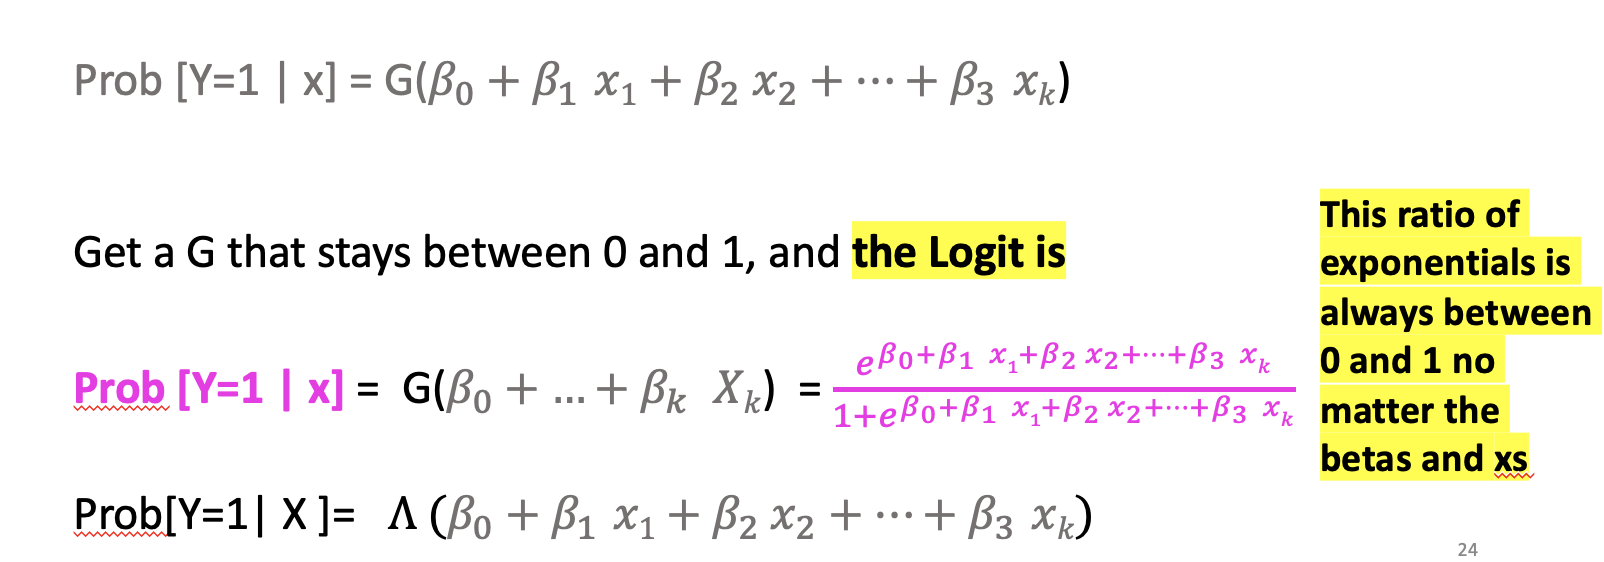

In [ ]:
###### Fixing Problem 2 so that predicted Y hats are less than 1 and greater than 0 --------------
# In R, use the glm(formula, data, family = binomial(link = "logit")) function

logit <- glm(inlf ~ nwifeinc + educ + age + kidslt6 + kidsge6, mydata, family = binomial(link = "logit"))
summary(logit)



Cannot easily interpret parameters here, 

next class estimate implied marginal effects given the above estimated Logit parameters 


 Parameters not very meaningful here. (they enter two exponentials to get Phat)
 
What we want is if say education changes by one, how does the Prob(y=1) change?


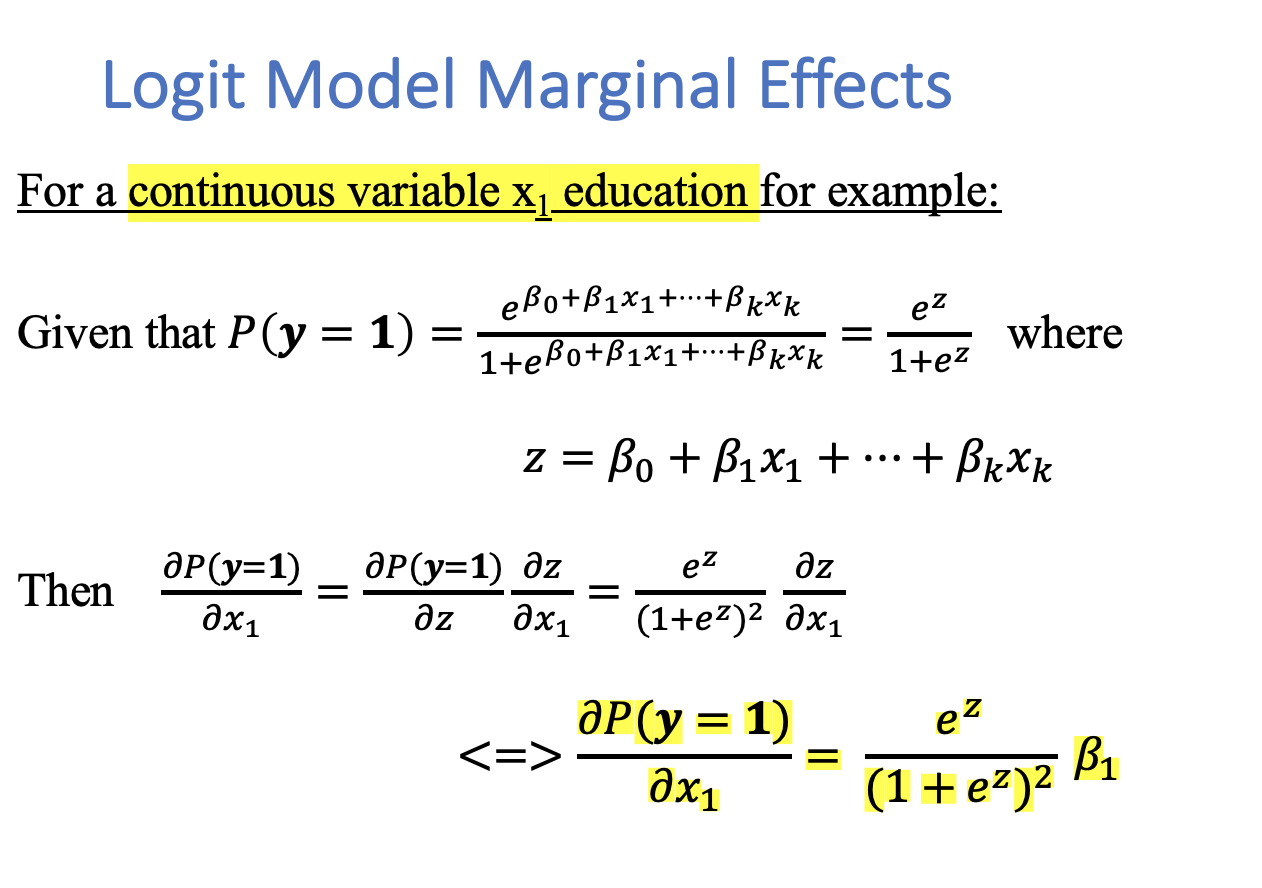

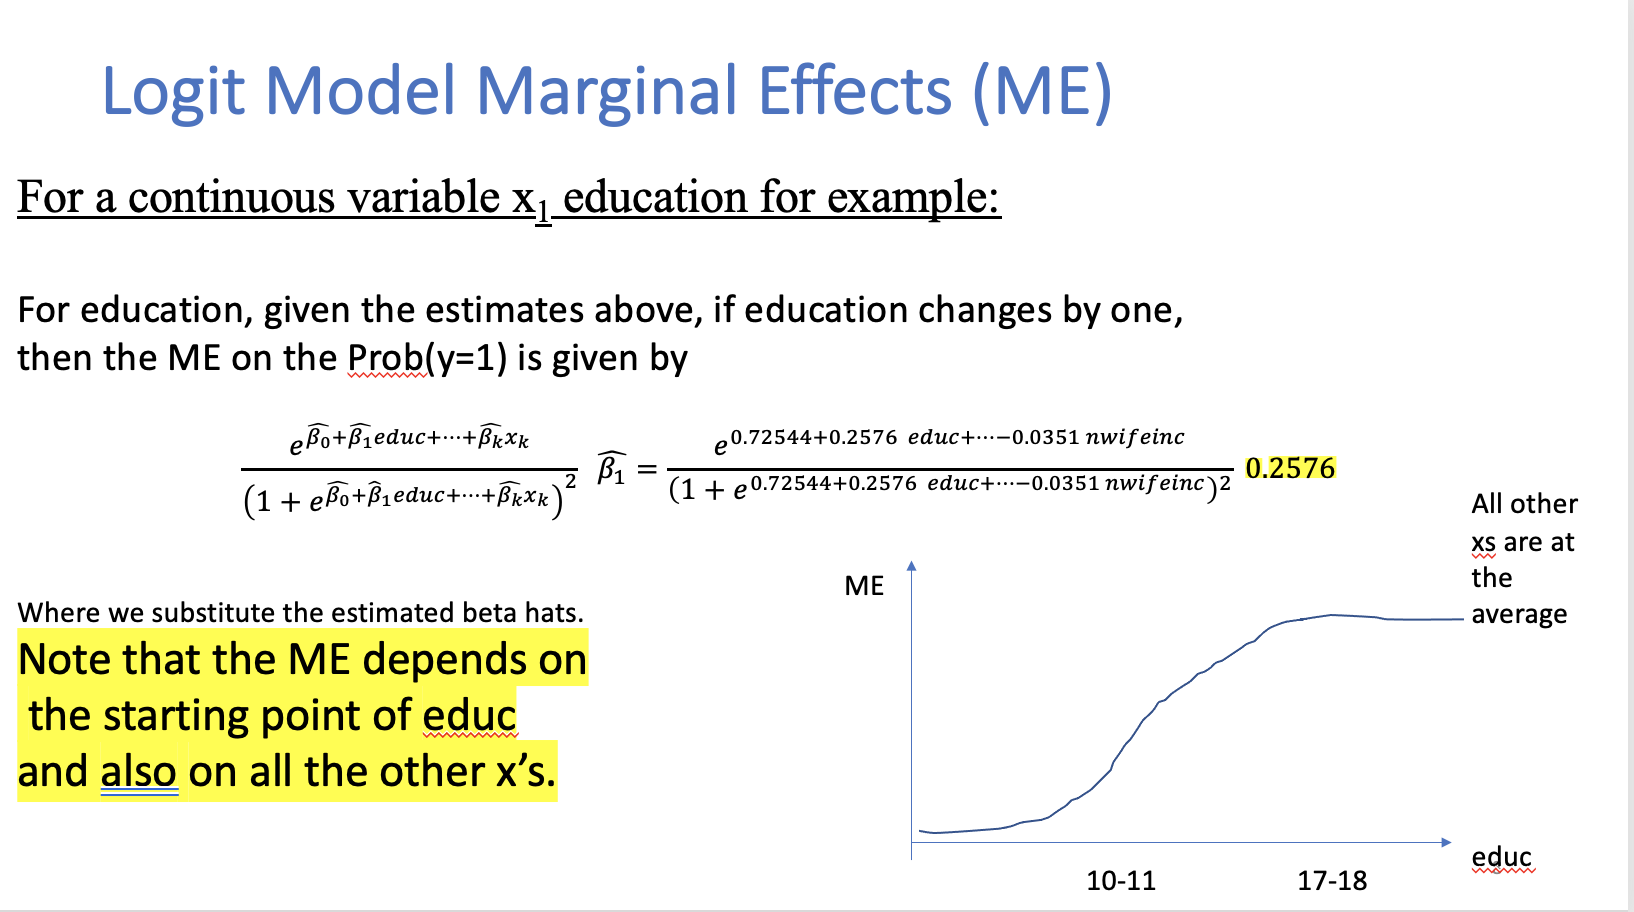



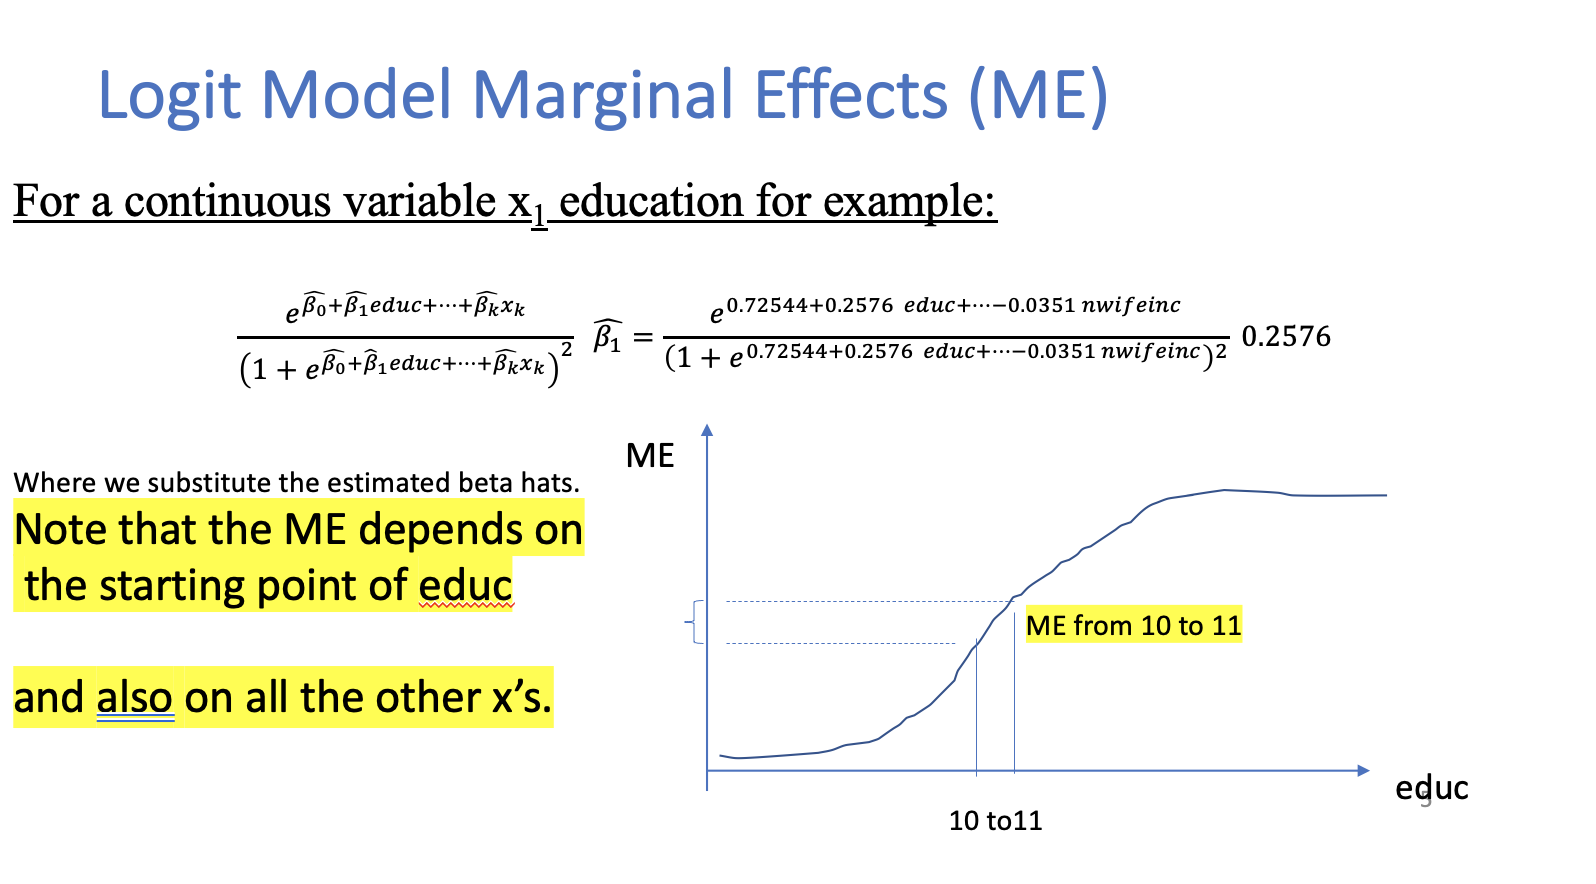

For a continuous variable x1 education for example:
 
How does one report the marginal effects (ME) then given that it depends on xs and starting point?

Report it for a fictitious person that would have all x’s at the average, that is, for 
 
(𝑒𝑑𝑢𝑐) ̅=12.2, (𝑘𝑖𝑑𝑠) ̅=0.238 etc etc, all average of all x’s, 
 
in this case, ME education is 0.0537, see next cell on how to get estimated ME


In [ ]:
 # replicate R’s margins, dydx(*) command:

margins <- margins(logit)
summary(margins)


In [ ]:
# create dataframe of mean data (i.e. one obs of X bar values)
meandata <- mydata %>%
  select(nwifeinc, educ, age, kidslt6, kidsge6) %>%
  summarise_all(mean)

# replicate Stata's mfx command:
mfx25 <- margins(logit, data = meandata)
summary(mfx25)
   

In [ ]:
#generate predictions

mydata <- mutate(mydata, log_fit = logit$fitted.values) # add in the logit fitted values
       

#Reproduce figures for logit
# no need to use the second approach as we're always within [0,1] with logit
# set data and aesthetics (x and y vars here since the same for all elements)
ggplot(mydata, aes(x = educ, y = log_fit)) +
  # First add points, color determined by whether in or out of [0,1]
  geom_point() + # add points
  # add horizontal lines, width slightly wider, making partially transparent, and choosing color
  geom_hline(yintercept=0, size = 1.4, alpha = 0.35, color = "red") + # add horizontal line at y=0
  geom_hline(yintercept=1, size = 1.4, alpha = 0.35, color = "red") + # add horizontal line at y=1
  # generate labels
  labs(title = "Predicted Probability of Labor Force Participation and Education Level",
       subtitle = "Logit Model",
       x = "Years of Schooling",
       y = "Fitted Value (Probability of in Labor Force Participation)")

# actual vs predicted
ggplot(mydata, aes(x = factor(inlf), y = log_fit)) +
  # First add points, color determined by whether in or out of [0,1]
  geom_point() + 
  # add horizontal lines, width slightly wider, making partially transparent, and choosing color
  geom_hline(yintercept=0, size = 1.4, alpha = 0.35, color = "red") + # add horizontal line at y=0
  geom_hline(yintercept=1, size = 1.4, alpha = 0.35, color = "red") + # add horizontal line at y=1
  # generate labels
  labs(title = "Predicted vs Actual Probability of Labor Force Participation, 1975",
       subtitle = "Logit Model",
       x = "Actual Labor Force Participation, 1975",
       y = "Estimated Labor Force Participation")



### Marginal Effect for a Discrete variable X

For a discrete variable x1 city for example:
 

  We need to compute the difference in probability, that is
 
ME city= Prob(y=1| x, city=1) – Prob(y=1| x, city=0)

 
And once again we evaluate all at the average of all other x’s

(*) dy/dx is for discrete change of dummy variable from 0 to 1




In [ ]:
#run a logit with a city dummy variable
logit2 <- glm(inlf ~ nwifeinc + educ + age + kidslt6 + kidsge6+city, mydata, family = binomial(link = "logit"))
summary(logit2)

# create dataframe of mean data (i.e. one obs of X bar values)
meandata2 <- mydata %>%
  select(nwifeinc, educ, age, kidslt6, kidsge6, city) %>%
  summarise_all(mean)



# replicate Stata's margins, dydx(*) command:
margins2 <- margins(logit2)
summary(margins2)



For a city relative to not a city the probability of a woman being in the labor force increases by 0.004, 

but not significantly because the p value of the marginal effect is 0.913   

and confidence interval for city Marginal effect covers zero : lower= -0.06737453	  upper=0.075335006

# Estimation of Logit - by Maximum Likelihood

Maximum Likelihood

Derivation:  for each observation of a woman 

Suppose woman i working  Yi=1,  then, the prob is    Pr(Yi=1|xi]= Λ( 𝛽_0+𝛽_1 𝑥1𝑖 ) 

Suppose woman j is not working, Yi=0, then the prob of that is     Pr(Yj=0|xj]= 1- Λ(𝛽_0+𝛽_1 𝑥1𝑗 ) 


Maximum Likelihood

The Probability of observing i working and j not is equal to the product below which is the

Likelihood       

=        (Λ 𝛽_0+𝛽_1 𝑥1𝑖 )   *  [1- Λ(𝛽_0+𝛽_1 𝑥1𝑗 ) ]


=   Pr(Yi=1|xi]        times       Pr(Yj=0|xj]







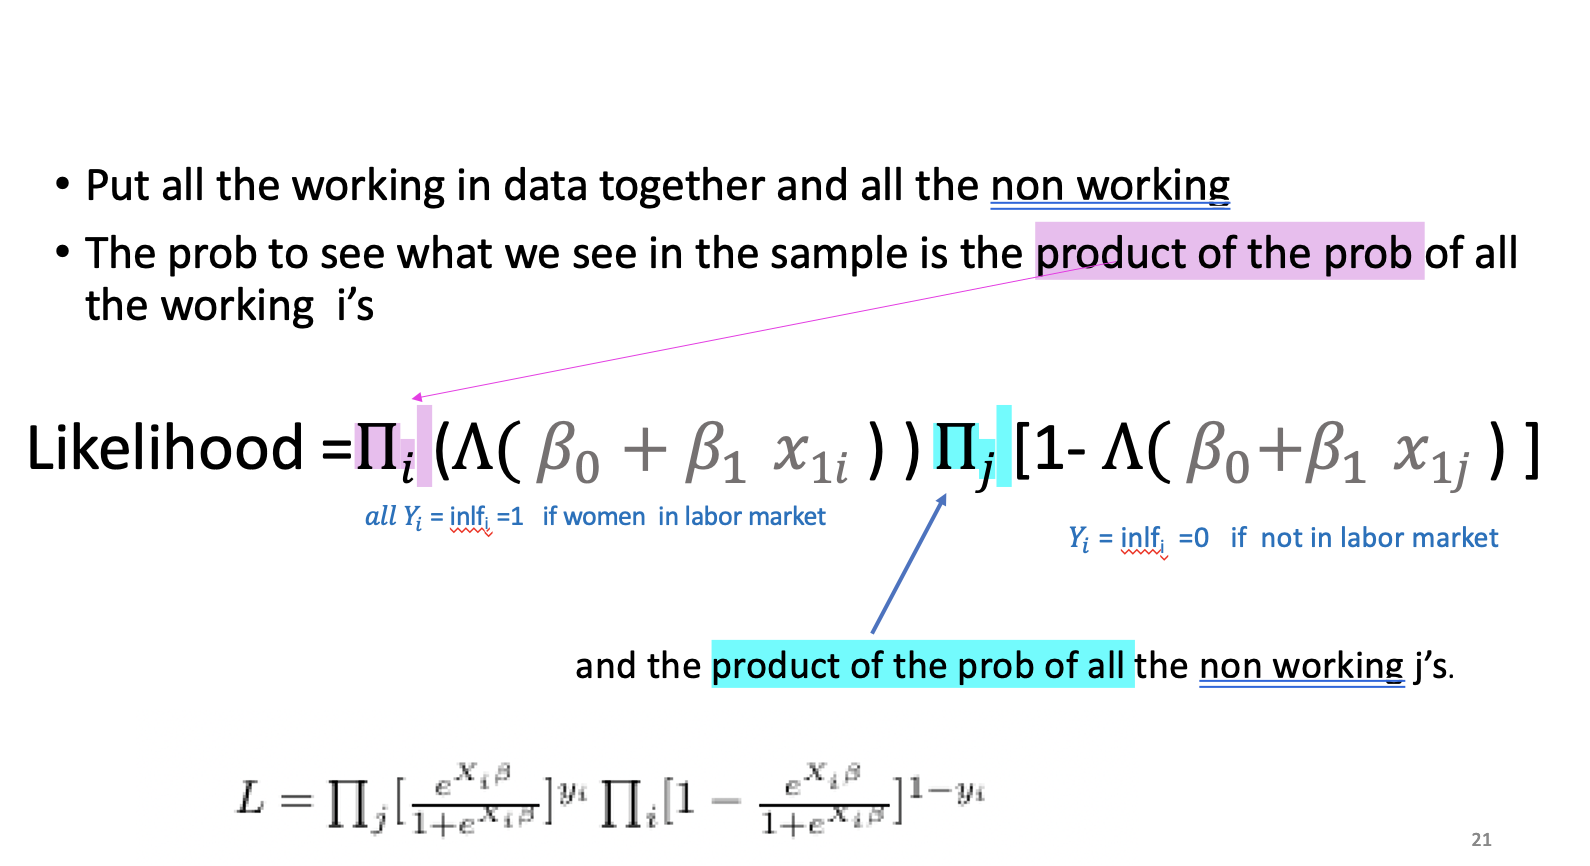

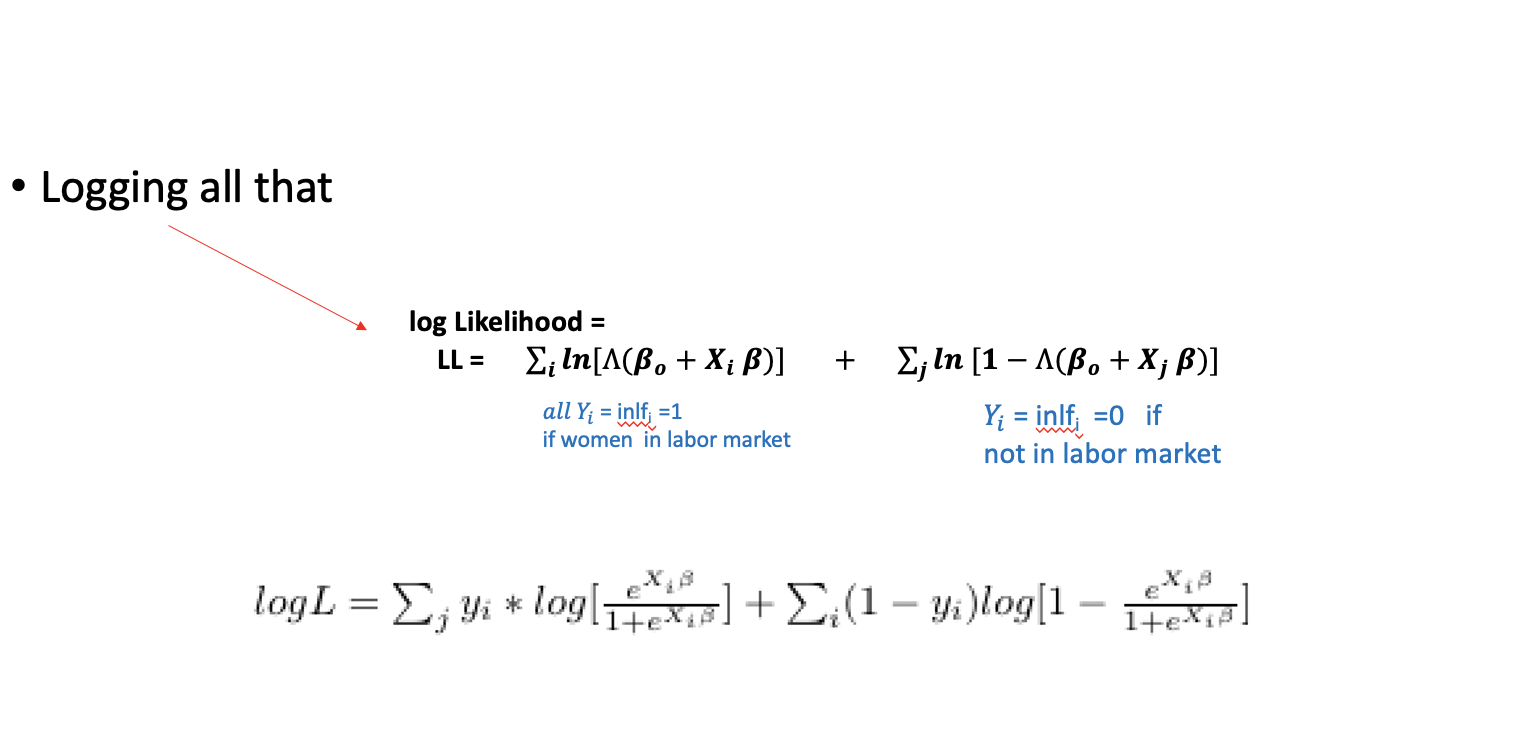

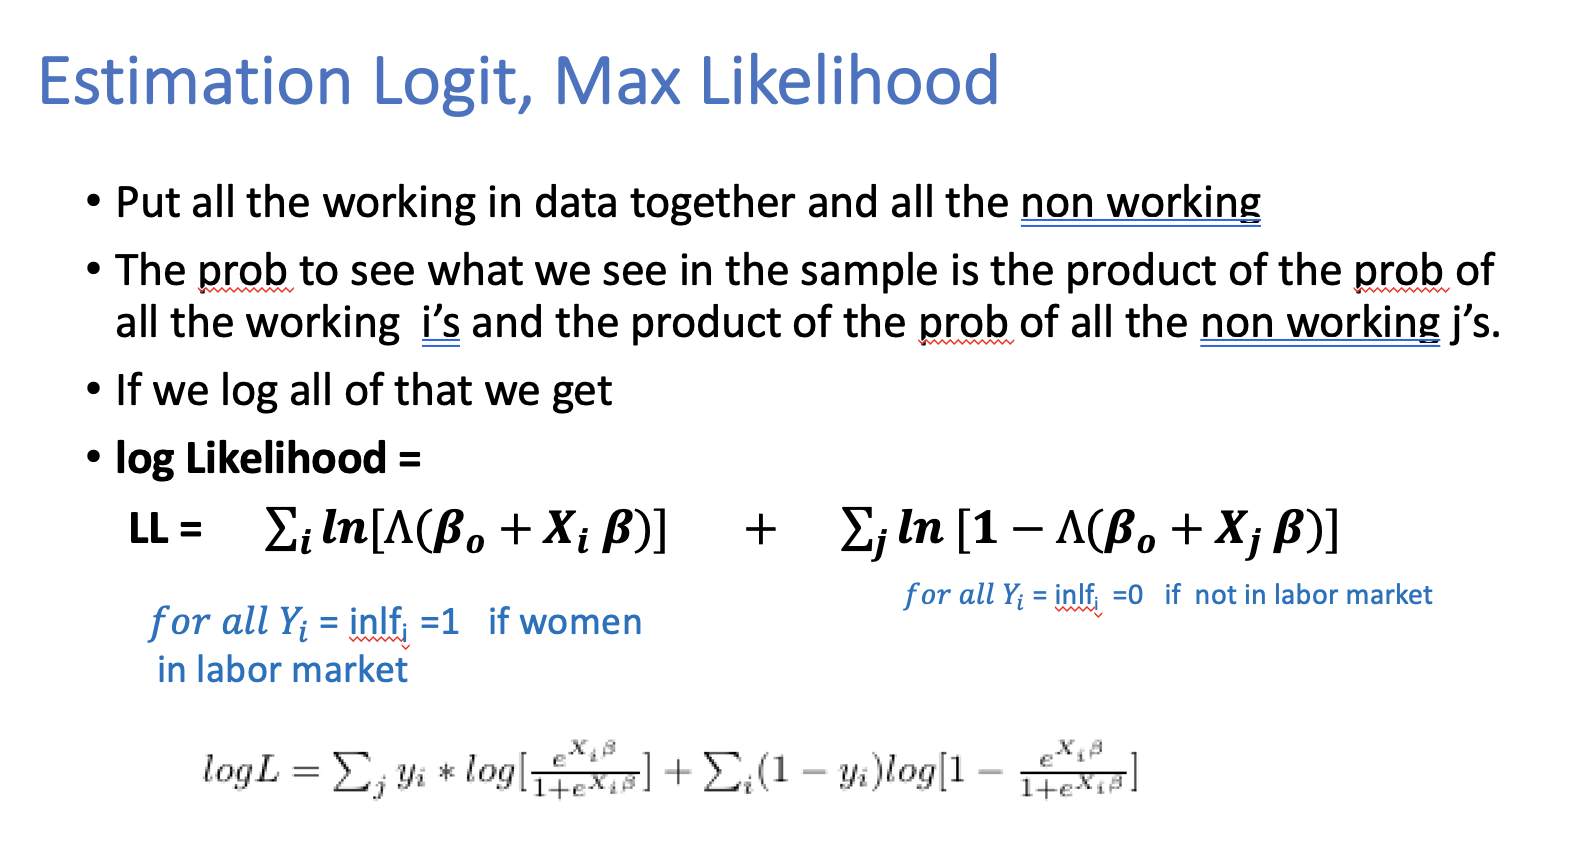

In [ ]:
#estimate a model with lots of X's

logit_u <- glm(inlf ~ nwifeinc + educ + age + kidslt6 + kidsge6+city+hushrs+husage+huseduc+huswage, mydata, family = binomial(link = "logit"))
summary(logit_u)

What do you see in the output above?

AIC reported, a good measure of fit that is also used for model comparison

Akaike information Criterion (AIC) , not R squared any more, no more minimizing SSR

now we are maximizing log Likelihood as the estimation criterion, what are the parameters that make the sample we see the most likely?

AIC: 922.36


obtained by

Akaike Information Criterion

AIC=ln(ei2/n)+(2k/n)=ln(SSR/n)+(2k/n)










### Hypothesis testing for one coefficient?


In [ ]:
#Hypothesis testing for one coefficient

#Single parameter test-  use normal  z below 


#Coefficients:
#                            Estimate  Std. Error    z value  Pr(>|z|) 
                            
#(Intercept)                 0.725440   0.789091    0.919    0.358    

#nwifeinc                    -0.035075   0.008067   -4.348   1.37e-05 ***

#educ                         0.257560   0.040910    6.296    3.06e-10 ***

#age                         -0.057689   0.012800   -4.507   6.58e-06 ***

#kidslt6                     -1.484777   0.198075   -7.496   6.58e-14 ***

#kidsge6                       -0.066625   0.067901   -0.981   0.326    

#city                           0.019103   0.174730    0.109    0.913 



For example, reject that educaition coefficient is zero. z stat is 6.29 p value  3.06e-10 ***

### Hypothesis Testing for multiple coefficients?

likelihood ratio test in step 2

and critical values of a chi squared distribution in step 3


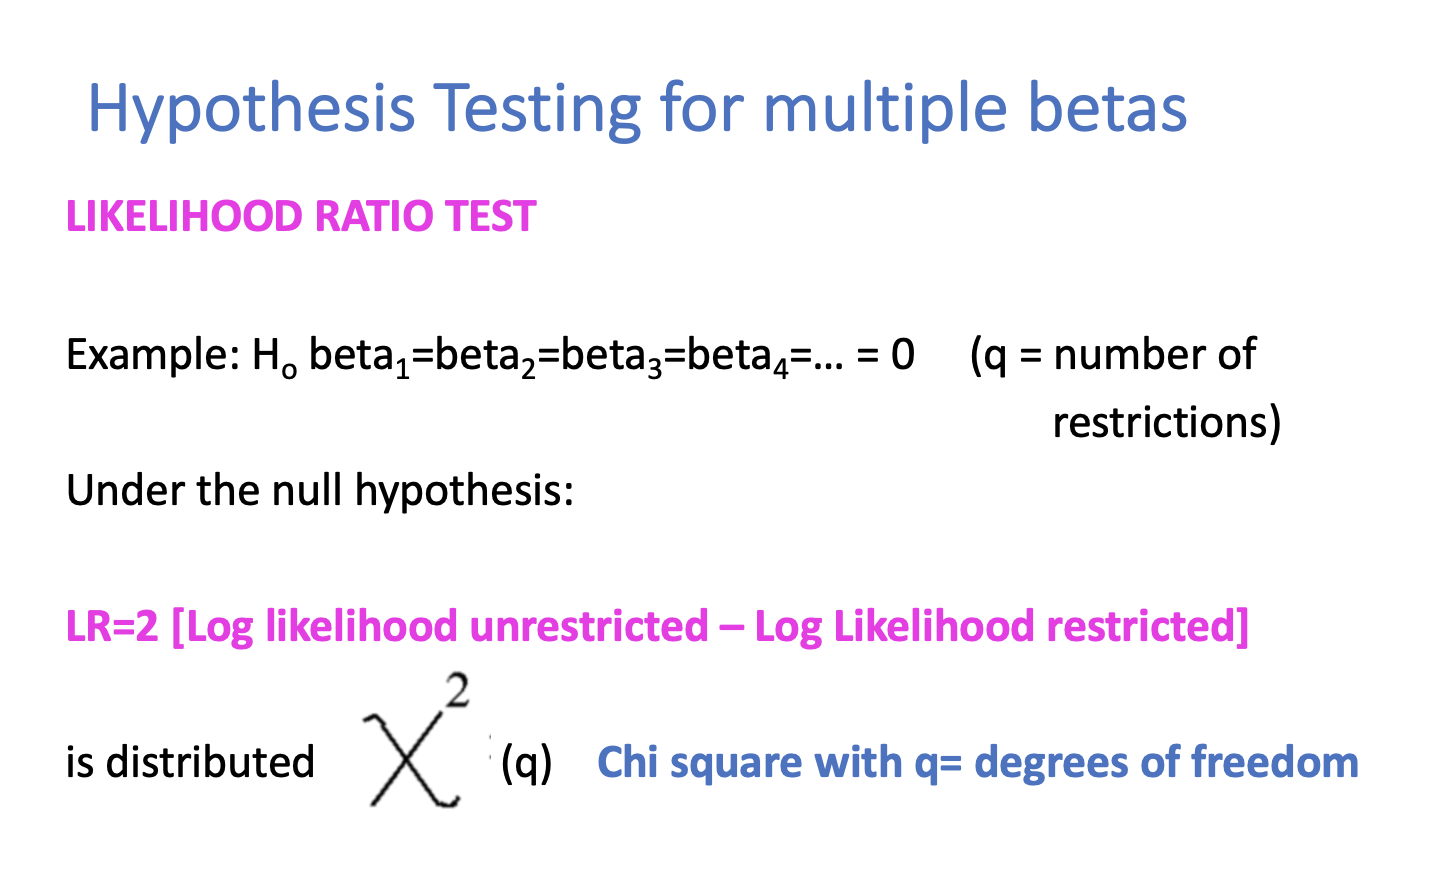

### The chi -square distribution and table

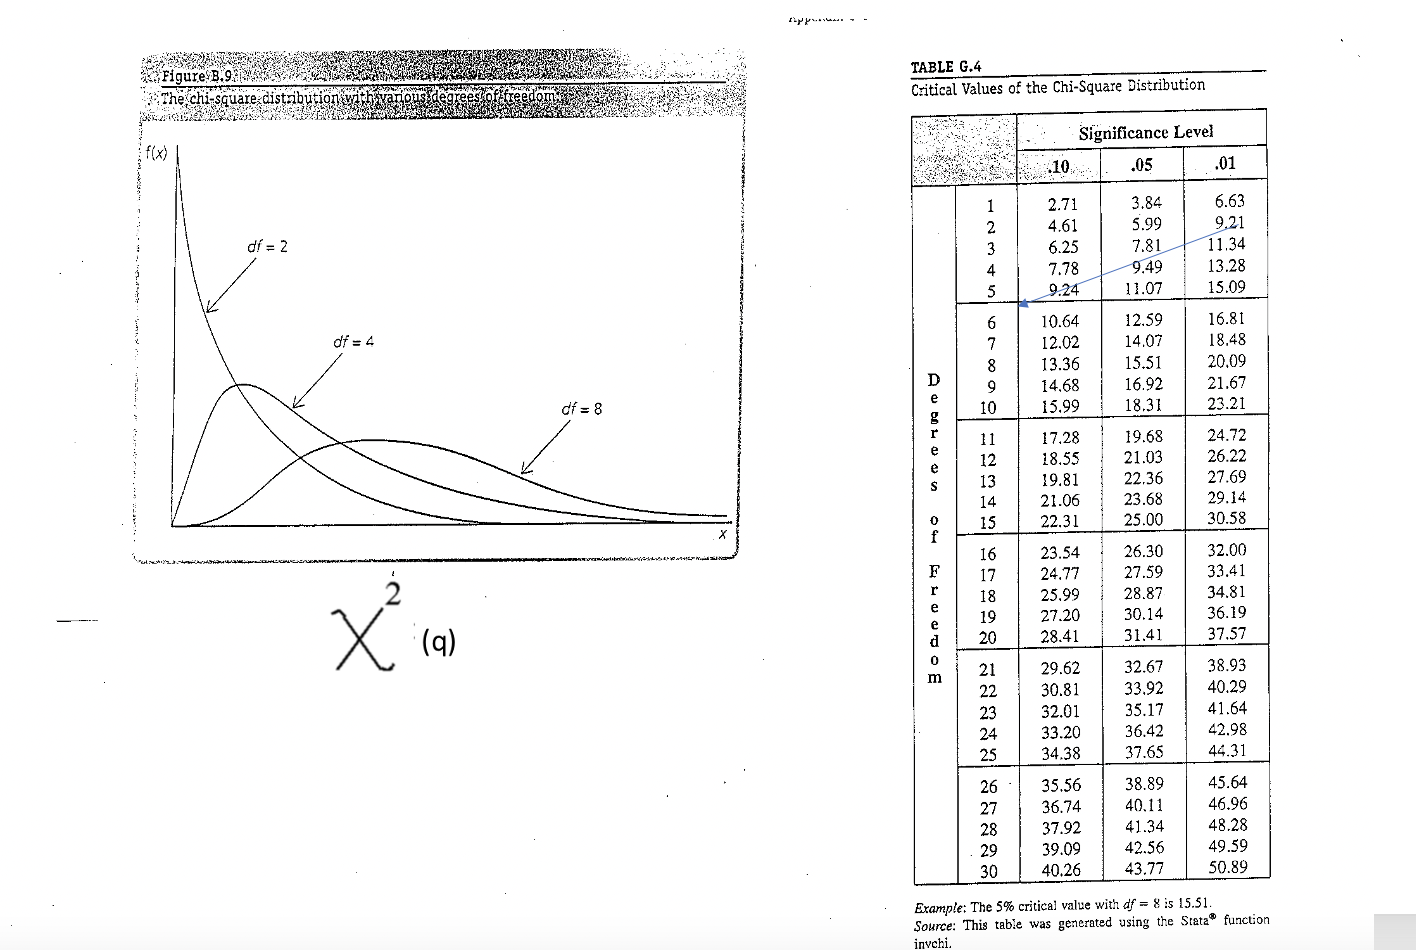

### 5 Steps as usual in hypothesis Testing

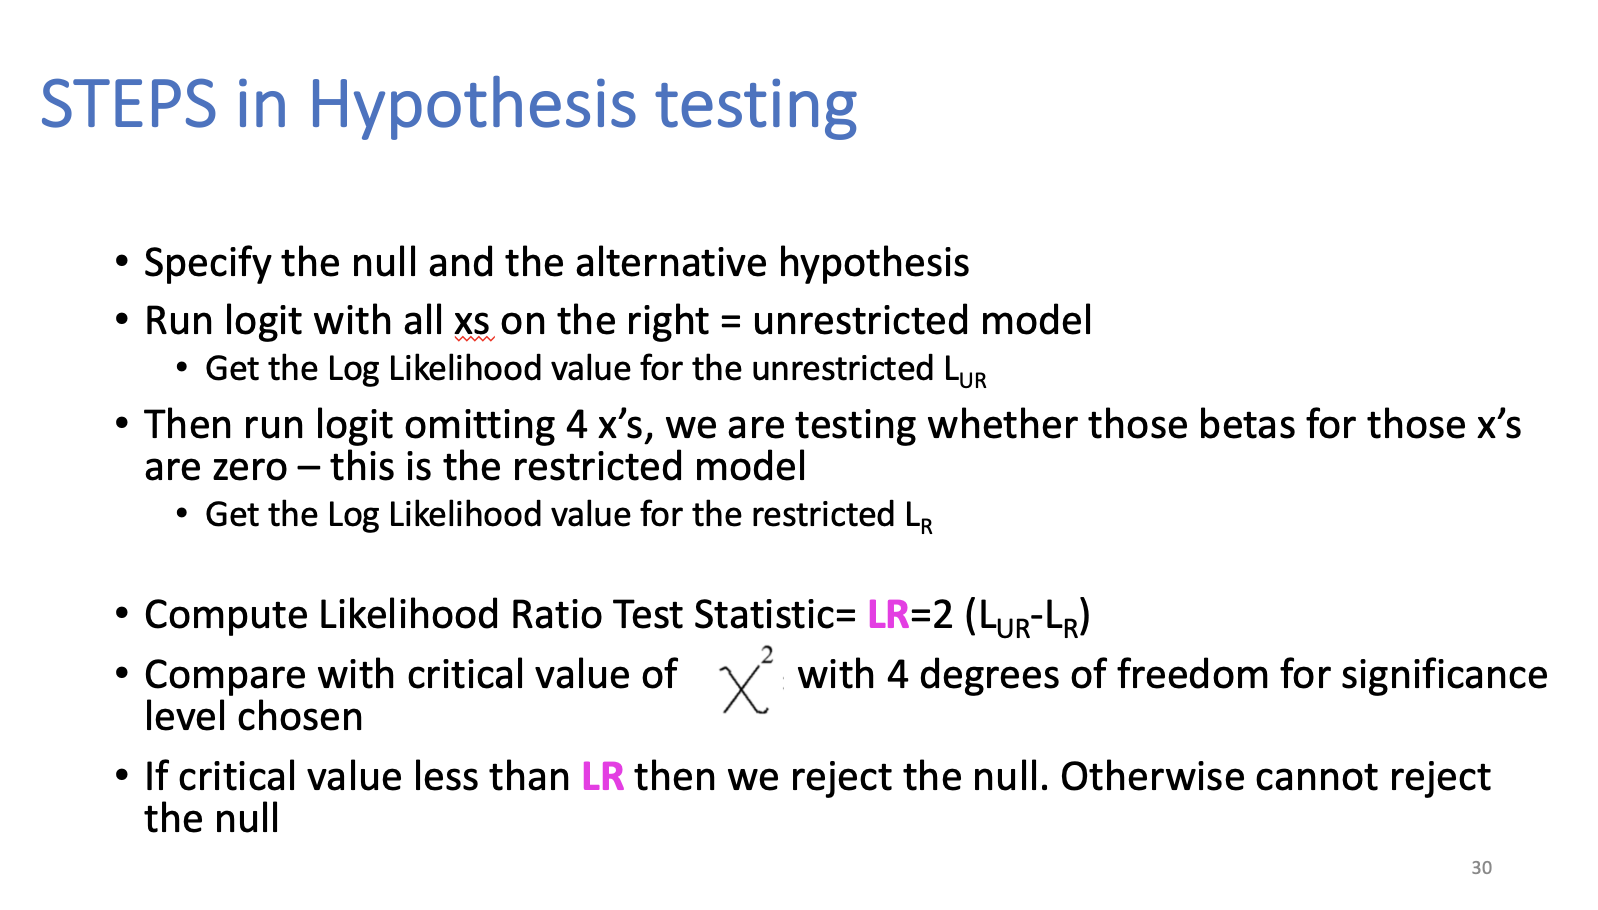

### now coding and computing and doing the actual test



In [ ]:
#step 1 Null that coefficients on the four husbands charactetistics, all four of them, are zero, 4 beta=0 restrictions

#step 2


#likelihood testing

#run unrestricted model
logit_u <- glm(inlf ~ nwifeinc + educ + age + kidslt6 + kidsge6+city+hushrs+husage+huseduc+huswage, mydata, family = binomial(link = "logit"))
summary(logit_u)

#get the log likelihood of the unrestricted model

In [ ]:
#run the restricted model
#no husband charct as regressors

logit_r <- glm(inlf ~ nwifeinc + educ + age + kidslt6 + kidsge6+city, mydata, family = binomial(link = "logit"))
summary(logit_r)



#get the log likelihood of restricted model


In [ ]:
#get both log likelihood values for the test statistics we will compute to end step 2

#get log likelihood value unrestricted
logLik(logit_u)



In [ ]:
#get log likelihood value restricted
logLik(logit_r)

#compute the chi square stat

#By hand, you will do this in Pset 5: 

#LR = 2 (loglikelihood UR – loglikelihood R) = 2 *(-450.237- +  454.179)=2 *3.94

#So LR = chi2(4) =    7.89


#step 3  go to the table and get the critical value for a certain significance level

#see below

Step 3: get critical value from Chi squared Table: 

at 10% c=7.78

At 5% c=9.49 




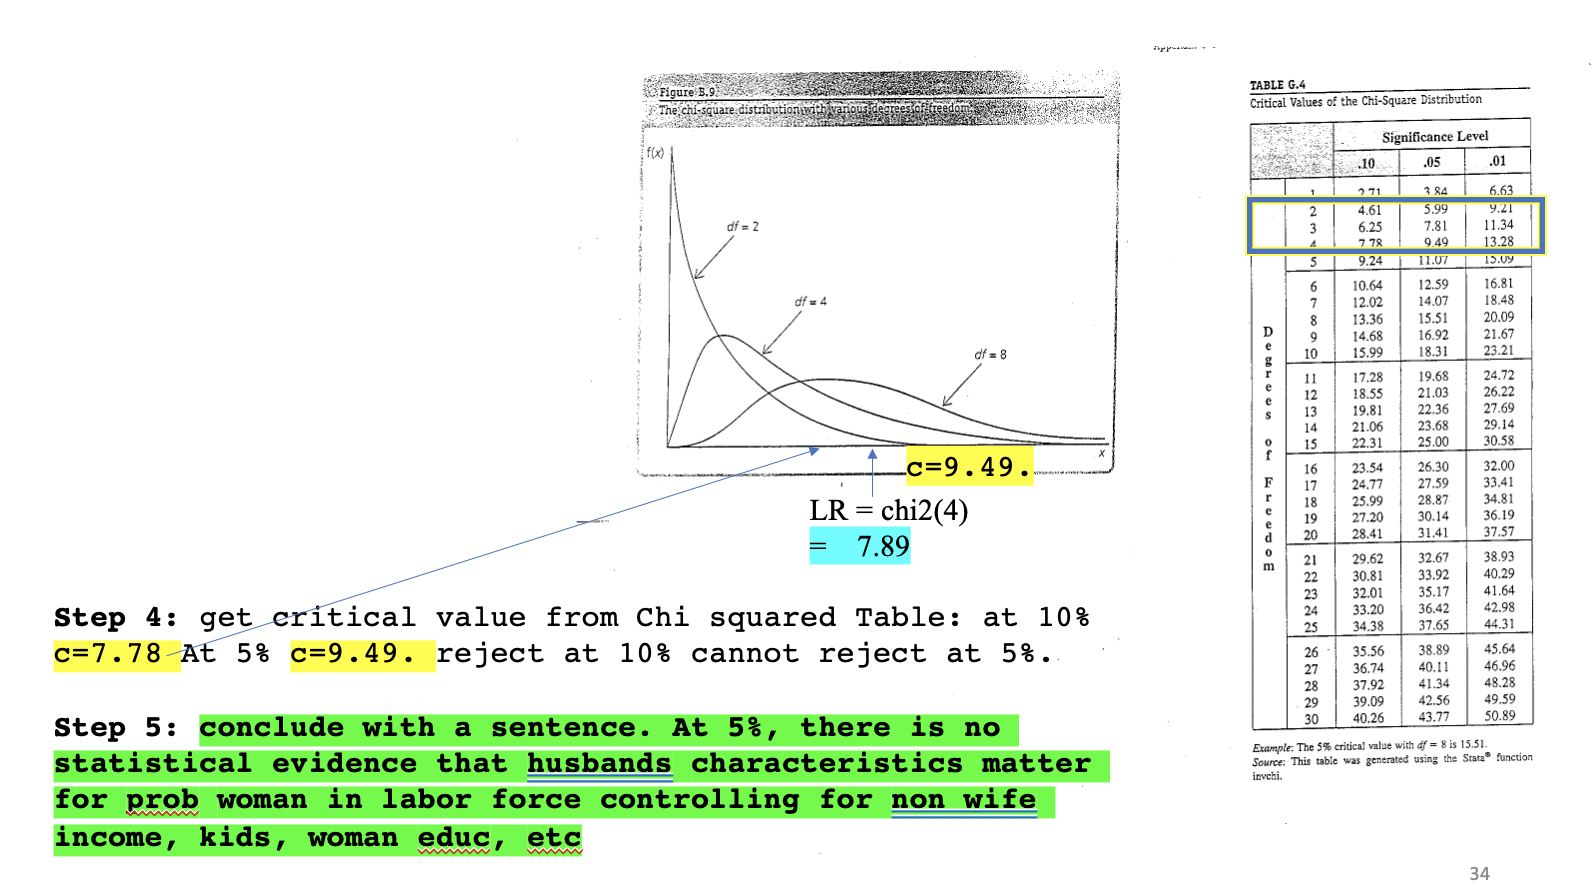

#step 4

#at 10% c=7.78 < LR=7.89  so we reject the null at 10%

#at 5% c=9.49 > LR = 7.89, so we cannot reject the null at 5%
 
#Step5: conclude with a sentence. At 5%, there is no statistical evidence that husbands characteristics matter for prob woman in labor force controlling for non wife income, kids, woman educ, etc


# all together

Step 1: H0   Beta_hushrs=Beta_husage=Beta_huseduc=Beta_huswage=0

        H1   not H0
        
Step 1: under the null 2 (loglikelihood UR – loglikelihood R) follows a Chi Square with q degrees of freedom


Step 2: 

By hand, you will do this in Pset 5: 

LR = 2 (loglikelihood UR – loglikelihood R) = 2 *(-450.237- +  454.179)=2 *3.94

So LR = chi2(4) =    7.89
 

Step 3: get critical value from Chi squared Table: at 10% c=7.78 At 5% c=9.49. reject at 10% cannot reject at 5%.
 

Step 4/5: conclude with a sentence. At 5%, there is no statistical evidence that husbands charct matter for prob woman in labor force controlling for non wife income, kids, woman educ, etc


In [ ]:
#in your career you can use a canned command, not in this class though...

##in R: various equivalent specifications of the LR test
lrtest(logit_u, logit_r)


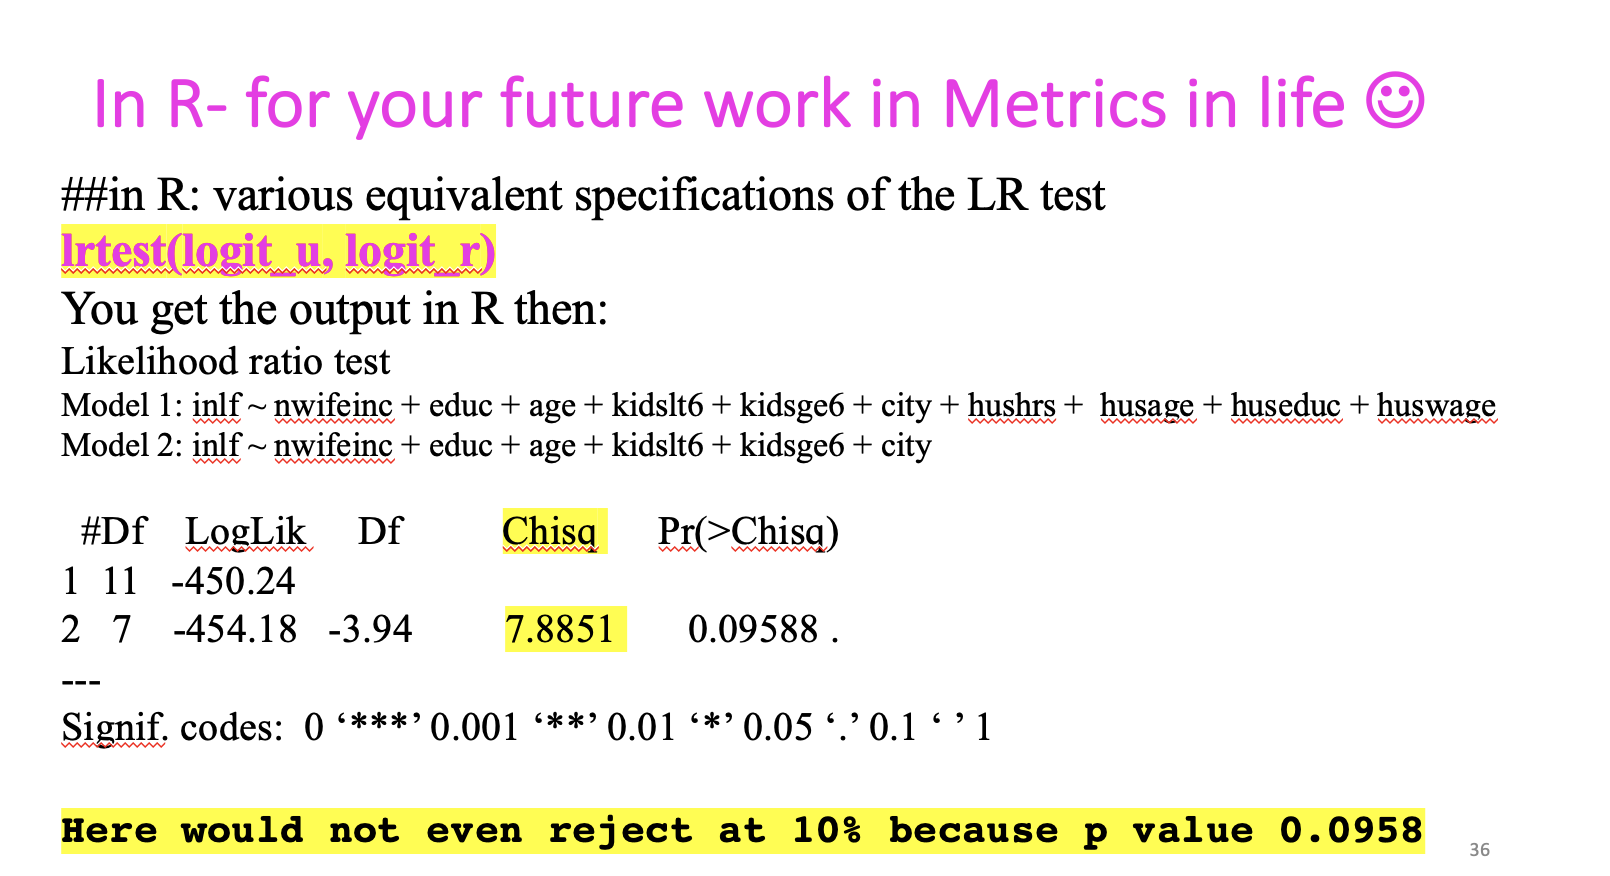

the end